# Classification with Keras

Exercise:-

Using the datasets methods in sklearn (make_classification), create a
data set with 500,000 observations and 3 classes. Add some noise too.

1. Implement a neural network model with 4 hidden layers using Keras
2. Varying the number of neurons and activation functions
3. Plot the training and testing error, training and testing accuracy
4. Plot the confusion matrix and write a summary of your findings.

#### Import dependencies

In [15]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from warnings import filterwarnings
filterwarnings('ignore')

#### Create Dataset

We generate a dataset with 3 labels and 500,000 observations. We also add some noise to the dataset using the flip_y parameter.

In [16]:
X, y = make_classification(n_samples=500000,
                    n_features=20,
                    n_informative=15,
                    n_classes=3,
                    random_state=42,
                    flip_y=0.05,
                    class_sep=0.8
                )

#### Data Preprocessing - apply StandardScaler to standardize the data.

In [22]:
# look at features of the dataset
df_x = pd.DataFrame(X[:10])
df_y = pd.DataFrame(y[:10])


In [27]:
df_x.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
3,-4.346368,-0.377471,-5.868064,2.570773,1.013043,1.241777,-3.624907,3.000738,-1.899419,-1.874832,0.631155,0.876453,-0.937904,-0.615345,-2.677234,-1.125314,5.665944,1.208162,-3.740610,-0.602735
0,-1.308211,2.207932,-2.065597,-4.466238,0.878186,-1.287819,2.884497,-0.199518,-1.922796,-0.166177,0.947965,0.611264,0.325431,0.006732,1.528036,0.560235,-2.274731,-1.988404,4.860349,3.743010
9,0.032846,-3.925964,-1.199812,-1.160957,-3.565536,2.420065,-2.537678,0.809443,0.973406,-0.432289,0.611865,1.355603,1.052527,-0.851206,-0.686079,0.661713,-1.580492,2.953581,-1.343680,3.970507
2,1.067124,1.192314,-1.792380,2.743194,-2.589117,-4.014939,-0.981239,3.179787,1.738362,-0.280371,-1.647910,0.782087,-0.671920,1.199504,1.677244,-1.675732,2.669432,0.682581,0.922692,-2.322584
1,-0.808736,0.783323,-3.034615,-1.208762,5.691849,-2.475700,3.038247,2.295577,1.590032,-0.779579,-0.626236,0.286457,2.520572,0.239821,-2.094659,-0.292419,0.441020,1.121055,4.055292,-4.702953


In [28]:
df_y.sample(5)

,0
5,1
6,1
3,2
0,1
1,1


In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### Perform classification using keras

In [30]:
# import dependencies
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

##### Convert the target variable to categorical format.

In [31]:
y = to_categorical(y)

#### Split the dataset into training and testing sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In this step, we split the dataset into training and testing sets. We keep `70%` of the dataset for training and `30%` for testing. We also set a random seed for reproducibility.

### 1. Using 4 hidden layers and ReLU activation function

In [38]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_dim=(X_train.shape[1])),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=20, batch_size=32
                )

Epoch 1/20
10938/10938 [==============================] - 29s 2ms/step - loss: 0.2934 - accuracy: 0.9159 - val_loss: 0.2089 - val_accuracy: 0.9521
Epoch 2/20
10938/10938 [==============================] - 20s 2ms/step - loss: 0.1991 - accuracy: 0.9552 - val_loss: 0.1931 - val_accuracy: 0.9567
Epoch 3/20
10938/10938 [==============================] - 21s 2ms/step - loss: 0.1925 - accuracy: 0.9573 - val_loss: 0.1888 - val_accuracy: 0.9591
Epoch 4/20
10938/10938 [==============================] - 26s 2ms/step - loss: 0.1897 - accuracy: 0.9584 - val_loss: 0.1886 - val_accuracy: 0.9584
Epoch 5/20
10938/10938 [==============================] - 25s 2ms/step - loss: 0.1885 - accuracy: 0.9589 - val_loss: 0.1877 - val_accuracy: 0.9594
Epoch 6/20
10938/10938 [==============================] - 21s 2ms/step - loss: 0.1874 - accuracy: 0.9592 - val_loss: 0.1859 - val_accuracy: 0.9597
Epoch 7/20
10938/10938 [==============================] - 21s 2ms/step - loss: 0.1870 - accuracy: 0.9592 - val_loss: 0

### Compute and plot the confusion matrix

4688/4688 [==============================] - 7s 1ms/step


Text(50.722222222222214, 0.5, 'True labels')

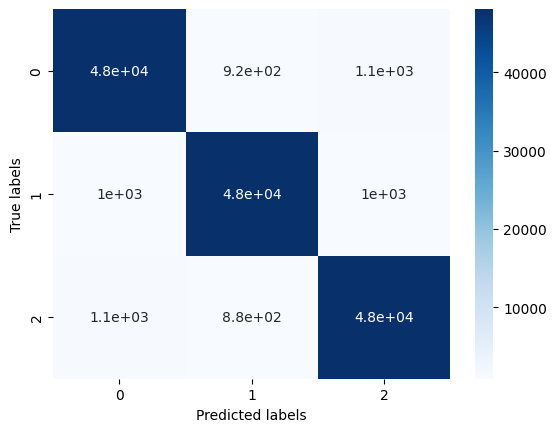

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

Here, we predict the classes for the testing data and calculate the confusion matrix to evaluate the performance of our model. We then use the seaborn library to plot the confusion matrix.



### Plot the residual, training and testing error

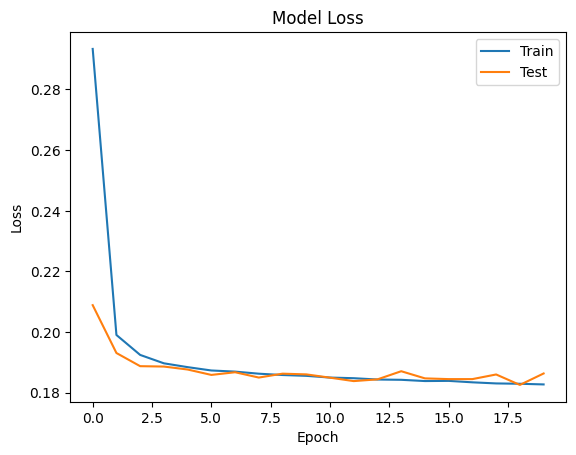

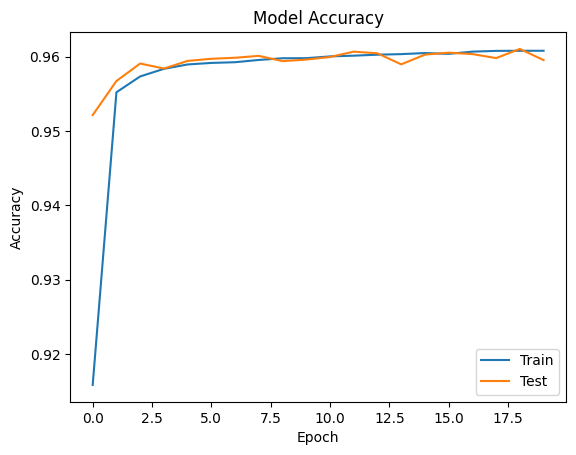

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In this step, we plot the model loss and accuracy for both training and testing data. This helps us to understand how well our model is performing on both datasets and whether the model is overfitting or not. We can adjust the number of epochs or the model architecture to improve the performance.

In [41]:
# Evaluate the model on the training and testing data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Training Loss: ", train_loss)
print("Training Accuracy: ", train_accuracy)
print("Testing Loss: ", test_loss)
print("Testing Accuracy: ", test_accuracy)

Training Loss:  0.18279440701007843
Training Accuracy:  0.9610000252723694
Testing Loss:  0.1863633245229721
Testing Accuracy:  0.9595266580581665


RESULT: Based on the training loss and accuracy, we can deduce that the model has a good performance.

On the training data, the model demonstrates a high training accuracy of approximately 0.961(it correctly classifies 96.1% of the training examples). On the other hand, the model achieves a testing accuracy of approximately 0.959(accurately classifying 95.95% of the testing examples). These results suggest that the model has learnt effectively from the training data and is able to generalize well to unseen data, demonstrating strong performance overall.

### 2. Using 4 hidden layers and Tanh activation function

In [42]:
# Define the neural network model
model = Sequential([
    Dense(128, activation='tanh', input_dim=(X_train.shape[1])),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=20, batch_size=32
                )

Epoch 1/20
10938/10938 [==============================] - 27s 2ms/step - loss: 0.2895 - accuracy: 0.9176 - val_loss: 0.2164 - val_accuracy: 0.9487
Epoch 2/20
10938/10938 [==============================] - 25s 2ms/step - loss: 0.2041 - accuracy: 0.9532 - val_loss: 0.1948 - val_accuracy: 0.9560
Epoch 3/20
10938/10938 [==============================] - 23s 2ms/step - loss: 0.1962 - accuracy: 0.9555 - val_loss: 0.1958 - val_accuracy: 0.9555
Epoch 4/20
10938/10938 [==============================] - 23s 2ms/step - loss: 0.1937 - accuracy: 0.9565 - val_loss: 0.1931 - val_accuracy: 0.9567
Epoch 5/20
10938/10938 [==============================] - 25s 2ms/step - loss: 0.1919 - accuracy: 0.9572 - val_loss: 0.1932 - val_accuracy: 0.9566
Epoch 6/20
10938/10938 [==============================] - 26s 2ms/step - loss: 0.1906 - accuracy: 0.9574 - val_loss: 0.1925 - val_accuracy: 0.9567
Epoch 7/20
10938/10938 [==============================] - 24s 2ms/step - loss: 0.1897 - accuracy: 0.9578 - val_loss: 0

### Compute and plot the confusion matrix

4688/4688 [==============================] - 9s 2ms/step


Text(50.722222222222214, 0.5, 'True labels')

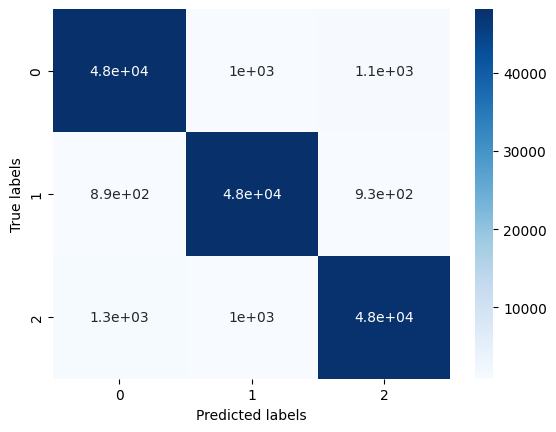

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

Here, we predict the classes for the testing data and calculate the confusion matrix to evaluate the performance of our model. We then use the seaborn library to plot the confusion matrix.



### Plot the residual, training and testing error

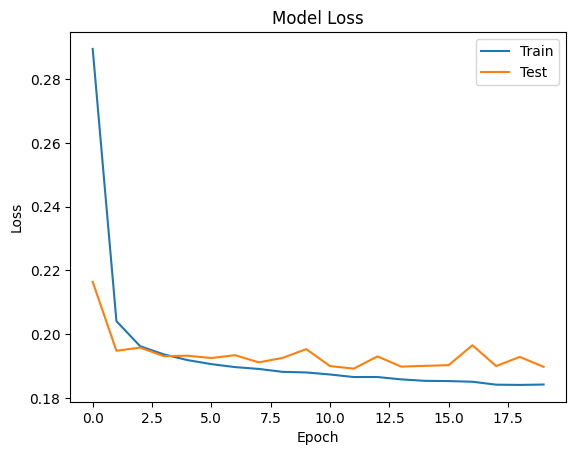

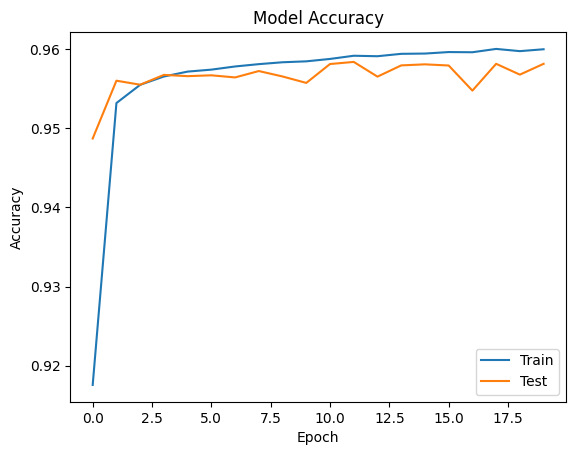

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [45]:
# Evaluate the model on the training and testing data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Training Loss: ", train_loss)
print("Training Accuracy: ", train_accuracy)
print("Testing Loss: ", test_loss)
print("Testing Accuracy: ", test_accuracy)

Training Loss:  0.18097569048404694
Training Accuracy:  0.9610857367515564
Testing Loss:  0.1897517740726471
Testing Accuracy:  0.9581466913223267


RESULT: Based on the training loss and accuracy, we can deduce that the model has a good performance.

On the training data, the model demonstrates a high training accuracy of approximately 0.961(it correctly classifies 96.1% of the training examples). On the other hand, the model achieves a testing accuracy of approximately 0.958(accurately classifying 95.95% of the testing examples). These results suggest that the model has learnt effectively from the training data and is able to generalize well to unseen data, demonstrating strong performance overall.

This shows that using the same number of hidden layers, the performance of the Tanh activation function does not differ much from that of the ReLU function which was used in training the previous model.

## 3. Using 3 hidden layers and Tanh activation function

In [51]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='tanh', input_dim=(X_train.shape[1])),
    Dense(32, activation='tanh'),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=20, batch_size=32
                )

Epoch 1/20
10938/10938 [==============================] - 27s 2ms/step - loss: 0.3767 - accuracy: 0.8826 - val_loss: 0.2803 - val_accuracy: 0.9309
Epoch 2/20
10938/10938 [==============================] - 29s 3ms/step - loss: 0.2599 - accuracy: 0.9397 - val_loss: 0.2435 - val_accuracy: 0.9474
Epoch 3/20
10938/10938 [==============================] - 34s 3ms/step - loss: 0.2356 - accuracy: 0.9495 - val_loss: 0.2282 - val_accuracy: 0.9522
Epoch 4/20
10938/10938 [==============================] - 23s 2ms/step - loss: 0.2234 - accuracy: 0.9533 - val_loss: 0.2200 - val_accuracy: 0.9546
Epoch 5/20
10938/10938 [==============================] - 26s 2ms/step - loss: 0.2162 - accuracy: 0.9551 - val_loss: 0.2156 - val_accuracy: 0.9557
Epoch 6/20
10938/10938 [==============================] - 23s 2ms/step - loss: 0.2112 - accuracy: 0.9564 - val_loss: 0.2114 - val_accuracy: 0.9566
Epoch 7/20
10938/10938 [==============================] - 22s 2ms/step - loss: 0.2075 - accuracy: 0.9570 - val_loss: 0

### Compute and plot the confusion matrix

4688/4688 [==============================] - 14s 3ms/step


Text(50.722222222222214, 0.5, 'True labels')

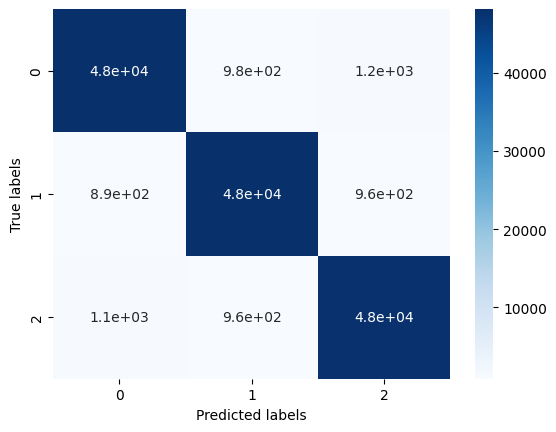

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

Here, we predict the classes for the testing data and calculate the confusion matrix to evaluate the performance of our model. We then use the seaborn library to plot the confusion matrix.



### Plot the residual, training and testing error

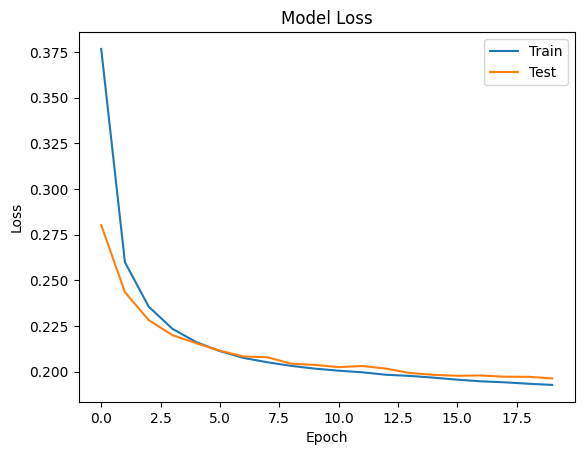

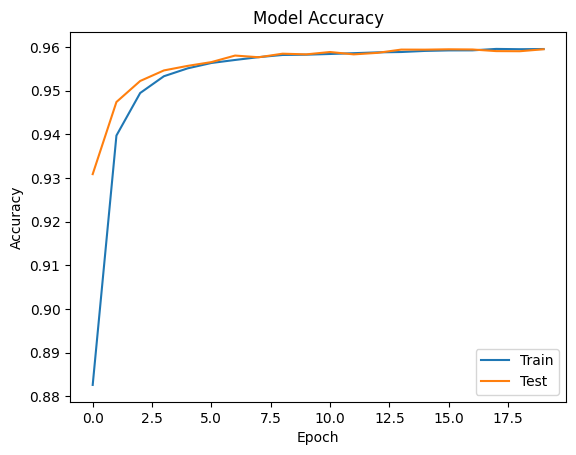

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [54]:
# Evaluate the model on the training and testing data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Training Loss: ", train_loss)
print("Training Accuracy: ", train_accuracy)
print("Testing Loss: ", test_loss)
print("Testing Accuracy: ", test_accuracy)

Training Loss:  0.19006752967834473
Training Accuracy:  0.9601342678070068
Testing Loss:  0.19628220796585083
Testing Accuracy:  0.9595000147819519


RESULTS: